[0, 1, 2, 3, 4, 5, 6, 7]


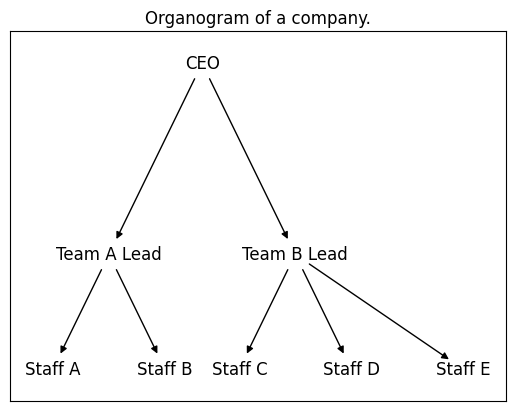

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.DiGraph()

nodes = np.arange(0, 8).tolist()
print(nodes)
G.add_nodes_from(nodes)
G.add_edges_from([(0,1), (0,2),
                  (1,3), (1, 4),
                  (2, 5), (2, 6), (2,7)])
pos = {0:(10, 10),
       1:(7.5, 7.5), 2:(12.5, 7.5),
       3:(6, 6), 4:(9, 6),
       5:(11, 6), 6:(14, 6), 7:(17, 6)}
labels = {
    0 : "CEO",
    1: "Team A Lead",
    2: "Team B Lead",
    3: "Staff A",
    4: "Staff B",
    5: "Staff C",
    6: "Staff D",
    7: "Staff E"
}
nx.draw_networkx(G, pos = pos, labels = labels, arrows = True,  node_shape = "s", node_color = "white")
plt.title("Organogram of a company.")
plt.savefig("tst.jpeg", dpi = 300)
plt.show()


In [67]:
def find_element_by_name(name, classifiers_arr):
    for cls in classifiers_arr:
        if cls["name"] == name:
            return cls
    return None

classifiers = [
    {
        "name": "svc",
        "comparaison": True
    },
    {
        "name": "decision_tree",
        "comparaison": True
    },
    {
        "name": "random_forest",
        "comparaison": False
    }
]

scores = [
    {
        "name": "F1 + accuracy score",
        "from": ["svc", "decision_tree"]
    },
    {
        "name": "F1 + mean score",
        "from": ["svc", "decision_tree", "random_forest"]
    },
    {
        "name": "F1 + mean score test",
        "from": ["svc", "random_forest"]
    }
]


X_START = 7 + 1

new_labels = {}
new_positions = {}
new_edges = []

max_val = X_START + len(classifiers) - 1
pos_y_cls = 10
for index, cls in enumerate(classifiers):
    new_labels[X_START + index] = cls["name"]
    cls["index"] = X_START + index
    new_edges += [(5, X_START + index), (6, X_START + index)]
    new_positions[X_START + index] = (100, pos_y_cls)

    if cls["comparaison"]:
        new_labels[X_START + len(classifiers) + index] = f"{cls['name']}_comparaison_{index}"
        new_positions[X_START + len(classifiers) + index] = (150, pos_y_cls)
        new_edges += [(X_START + index, X_START + len(classifiers) + index), (X_START + index, X_START + len(classifiers) + index)]
        max_val = max(max_val, X_START + len(classifiers) + index)

    pos_y_cls = pos_y_cls + 5

X_START = max_val + 1

pos_y_cls = 0

for index, score in enumerate(scores):
    new_labels[X_START + index] = score["name"]
    new_positions[X_START + index] = (150, pos_y_cls)
    new_edges += [(7, X_START + index)]

    for connection_name in score["from"]:
        new_edges += [(find_element_by_name(connection_name, classifiers)["index"], X_START + index)]

    pos_y_cls -= 10

print(max_val)
print(new_labels)
print(classifiers)
print(new_edges)
print(new_positions)

12
{8: 'svc', 11: 'svc_comparaison_0', 9: 'decision_tree', 12: 'decision_tree_comparaison_1', 10: 'random_forest', 13: 'F1 + accuracy score', 14: 'F1 + mean score', 15: 'F1 + mean score test'}
[{'name': 'svc', 'comparaison': True, 'index': 8}, {'name': 'decision_tree', 'comparaison': True, 'index': 9}, {'name': 'random_forest', 'comparaison': False, 'index': 10}]
[(5, 8), (6, 8), (8, 11), (8, 11), (5, 9), (6, 9), (9, 12), (9, 12), (5, 10), (6, 10), (7, 13), (8, 13), (9, 13), (7, 14), (8, 14), (9, 14), (10, 14), (7, 15), (8, 15), (10, 15)]
{8: (100, 10), 11: (150, 10), 9: (100, 15), 12: (150, 15), 10: (100, 20), 13: (150, 0), 14: (150, -10), 15: (150, -20)}


27 27


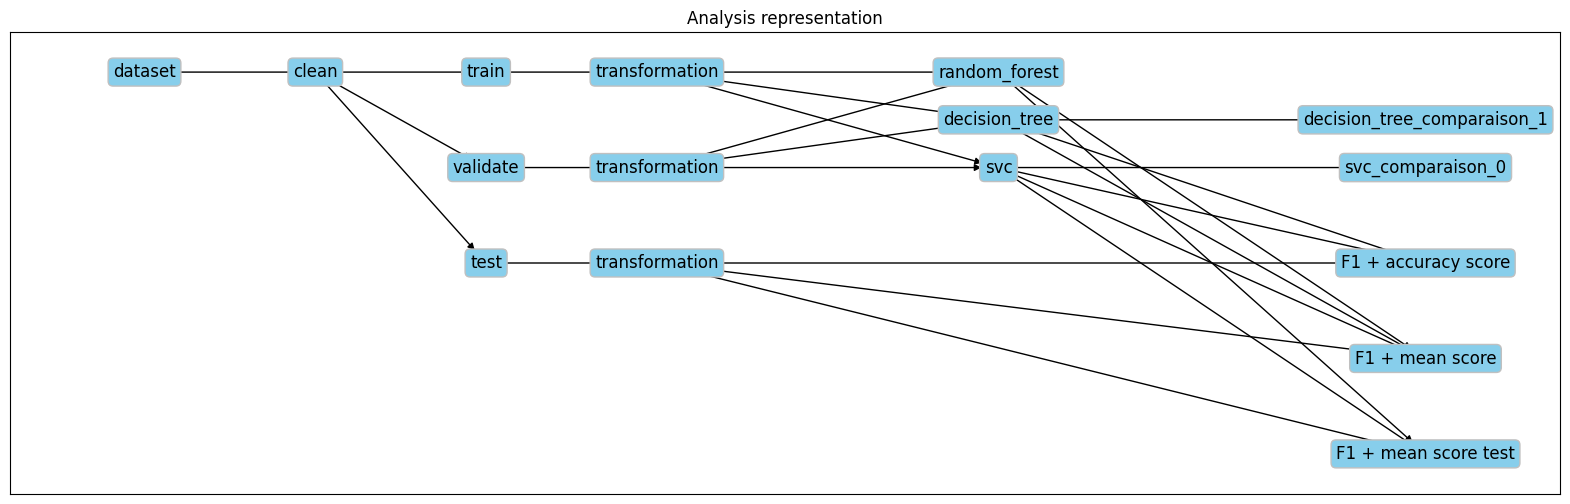

In [74]:
G = nx.DiGraph()

edges = [
    (0, 1),
    (1, 2),
    (1, 3),
    (1, 4),
    (2, 5),
    (3, 6),
    (4, 7),
]

edges += new_edges
edge_color = ["black" for i in range(len(edges))]
pos = {
    0: (0, 20),
    1: (20, 20),
    2: (40, 20),
    3: (40, 10),
    4: (40, 0),
    5: (60, 20),
    6: (60, 10),
    7: (60, 0),
}
pos.update(new_positions)
labels = {
    0: "dataset",
    1: "clean",
    2: "train",
    3: "validate",
    4: "test",
    5: "transformation",
    6: "transformation",
    7: "transformation",
}
labels.update(new_labels)

nodes = np.arange(0, len(labels)).tolist()


print(len(edges), len(edge_color))

G.add_nodes_from(nodes)
G.add_edges_from(edges)

fig = plt.figure(1, figsize=(20, 6))
nx.draw_networkx(G, pos = pos, labels = labels, arrows = True,  node_shape = "s", edge_color=edge_color, bbox = dict(facecolor = "skyblue", boxstyle = "round", ec = "silver", pad = 0.3))
# , connectionstyle="arc3,rad=0.05"

plt.title("Analysis representation")
plt.savefig("tst.jpeg")
plt.show()
